['Earth', 'Russia', 'Antarctica', 'Canada', 'China', 'N/A', 'Brazil', 'Australia', 'India', 'Argentina', 'Kazakhstan', 'Algeria', 'DR Congo', '', 'Greenland', 'Saudi Arabia', 'Mexico', 'Indonesia', 'Sudan', 'Libya', 'Iran', 'Mongolia', 'Peru', 'Chad', 'Niger', 'Angola', 'Mali', 'South Africa', 'Colombia', 'Ethiopia', 'Bolivia', 'Mauritania', 'Egypt', 'Tanzania', 'Nigeria', 'Venezuela', 'Pakistan', 'Namibia', 'Mozambique', 'Turkey', 'Chile', 'Zambia', 'Myanmar', 'Afghanistan', 'South Sudan', 'France', 'Somalia', 'Central African Republic', 'Ukraine', 'Madagascar', 'Botswana', 'Kenya', 'Yemen', 'France', 'Thailand', 'Spain', 'Turkmenistan', 'Cameroon', 'Papua New Guinea', 'Sweden', 'Uzbekistan', 'Morocco', 'Iraq', 'Paraguay', 'Zimbabwe', 'Norway', 'Japan', 'Germany', 'Congo', 'Finland', 'Vietnam', 'Malaysia', 'Norway', 'Ivory Coast', 'Poland', 'Oman', 'Italy', 'Philippines', 'Ecuador', 'Burkina Faso', 'New Zealand', 'Gabon', 'Western Sahara', 'Guinea', 'United Kingdom', 'Uganda', 'Ghana'

,Country/Dependency,Total area in km2,Total land area in km2,Total water area in km2
0,Earth,"510,072,000","148,940,000","361,132,000"
1,Russia,"17,098,246","16,378,410","719,836"
2,Antarctica,"14,200,000","14,200,000",0
3,Canada,"9,984,670","9,093,507","891,163"
4,China,"9,596,961","9,326,410","270,550"
5,N/A,"9,147,593","685,924",7.0
6,Brazil,"8,515,767","8,460,415","55,352"
7,Australia,"7,692,024","7,633,565","58,459"
8,India,"3,287,263","2,973,190","314,073"
9,Argentina,"2,780,400","2,736,690","43,710"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country/Dependency       265 non-null    object
 1   Total area in km2        265 non-null    object
 2   Total land area in km2   265 non-null    object
 3   Total water area in km2  265 non-null    object
dtypes: object(4)
memory usage: 8.4+ KB
count     265
unique    260
top        21
freq        3
Name: Total area in km2, dtype: object
count     265
unique    250
top       N/A
freq       12
Name: Total land area in km2, dtype: object
count     265
unique    145
top         0
freq       95
Name: Total water area in km2, dtype: object


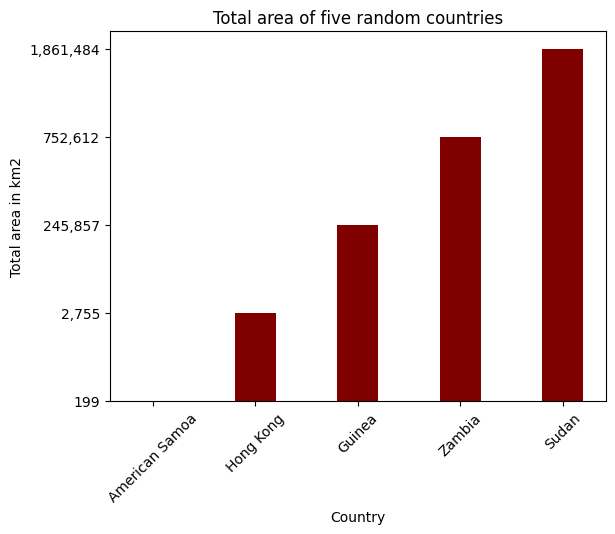

In [17]:
import requests
import pandas
from bs4 import BeautifulSoup
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import re


pandas.set_option('display.max_rows', None)

wiki = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area"
website_url = requests.get(wiki).text
soup = BeautifulSoup(website_url, 'lxml')

my_table = soup.find('table', {'class': 'wikitable'})

countries = []
total = []
land = []
water = []

for row in my_table.find_all('tr')[1:]:
    cells = row.find_all('td')

    if len(cells) >= 4:
        country_cell = cells[1].find('a')
        total_cell = cells[2].get_text(strip=True)
        land_cell = cells[3].get_text(strip=True)
        water_cell = cells[4].get_text(strip=True)

        if country_cell:
            countries.append(country_cell.text)
        else:
            countries.append("N/A")

        if total_cell:
            total.append(total_cell)
        else:
            total.append("N/A")

        if land_cell:
            land.append(land_cell)
        else:
            land.append("N/A")

        if water_cell:
            water.append(water_cell)
        else:
            water.append("N/A")

cleaned_total = []
cleaned_land = []
cleaned_water = []

for item in total:
    if '(' in item and ')' in item:
        cleaned_item = item[:item.index('(')] + item[item.rfind(')') + 1:]
        cleaned_total.append(cleaned_item.strip())
    else:
        cleaned_total.append(item)

for item in land:
    if '(' in item and ')' in item:
        cleaned_item = item[:item.index('(')] + item[item.rfind(')') + 1:]
        cleaned_land.append(cleaned_item.strip())
    else:
        cleaned_land.append(item)

for item in water:
    if '(' in item and ')' in item:
        cleaned_item = item[:item.index('(')] + item[item.rfind(')') + 1:]
        cleaned_water.append(cleaned_item.strip())
    else:
        cleaned_water.append(item)

print(countries)
print(cleaned_total)
print(cleaned_land)
print(cleaned_water)

final_data = pandas.DataFrame(
    {'Country/Dependency': countries,
     'Total area in km2': cleaned_total,
     'Total land area in km2': cleaned_land,
     'Total water area in km2': cleaned_water,
})

final_data.to_csv("List of countries and dependencies by area.csv")

display(final_data)

final_data.info()
print(final_data['Total area in km2'].describe())
print(final_data['Total land area in km2'].describe())
print(final_data['Total water area in km2'].describe())

import random

random_numbers = [random.randint(1, len(countries)) for _ in range(5)]

five_random_countries = random_numbers

random_numbers.sort(reverse=True)

countries_column = final_data["Country/Dependency"]
total_column = final_data["Total area in km2"]

selected_countries = []
selected_areas = []

for country in five_random_countries:
    selected_countries.append(countries_column[country])
    selected_areas.append(total_column[country])

plt.bar(selected_countries, selected_areas, color='maroon', width=0.4)

plt.xlabel("Country")
plt.ylabel("Total area in km2")
plt.title("Total area of five random countries")

plt.xticks(rotation=45)

plt.show()
